In [219]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None 

In [220]:
df = pd.read_csv('data_of_airlines.csv')

In [221]:
df.head()
#Посмотрим на пример данных, которые мы получили

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,ticket_comfort,ticket_business,flight_time,total_amount
0,136119,PG0252,AAQ,SVO,Boeing 737-300,2017-01-03T11:49:00Z,2017-01-03T10:08:00Z,102.0,0.0,11.0,101.0,1653000.0
1,136120,PG0252,AAQ,SVO,Boeing 737-300,2017-02-24T11:46:00Z,2017-02-24T10:07:00Z,98.0,0.0,11.0,99.0,1605400.0
2,136122,PG0252,AAQ,SVO,Boeing 737-300,2017-01-08T11:48:00Z,2017-01-08T10:08:00Z,87.0,0.0,10.0,100.0,1431000.0
3,136130,PG0252,AAQ,SVO,Boeing 737-300,2017-02-13T11:46:00Z,2017-02-13T10:07:00Z,97.0,0.0,10.0,99.0,1556600.0
4,136131,PG0252,AAQ,SVO,Boeing 737-300,2017-01-28T11:46:00Z,2017-01-28T10:07:00Z,112.0,0.0,12.0,99.0,1812800.0


In [222]:
df.info()
# Найдём в каких столбцах имеются нулевые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          127 non-null    int64  
 1   flight_no          127 non-null    object 
 2   departure_airport  127 non-null    object 
 3   arrival_airport    127 non-null    object 
 4   model              127 non-null    object 
 5   actual_arrival     127 non-null    object 
 6   actual_departure   127 non-null    object 
 7   ticket_economy     118 non-null    float64
 8   ticket_comfort     118 non-null    float64
 9   ticket_business    118 non-null    float64
 10  flight_time        127 non-null    float64
 11  total_amount       118 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 12.0+ KB


In [223]:
df['model'].value_counts()
#Видим, что из Анапы вылетают только 2 модели сомалета за данный период

Boeing 737-300         68
Sukhoi Superjet-100    59
Name: model, dtype: int64

In [224]:
df[df['model'] == 'Boeing 737-300'].info()
#Тут мы обнаружили пропущенные значения, но на всякий случай 
#проверим и вторую модель самолета, которая обслуживается в аэропорте Анапы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          68 non-null     int64  
 1   flight_no          68 non-null     object 
 2   departure_airport  68 non-null     object 
 3   arrival_airport    68 non-null     object 
 4   model              68 non-null     object 
 5   actual_arrival     68 non-null     object 
 6   actual_departure   68 non-null     object 
 7   ticket_economy     59 non-null     float64
 8   ticket_comfort     59 non-null     float64
 9   ticket_business    59 non-null     float64
 10  flight_time        68 non-null     float64
 11  total_amount       59 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 6.9+ KB


In [225]:
df[df['model'] == 'Sukhoi Superjet-100'].info()
#Здесь все хорошо, можно приступить к устранению пробелов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 68 to 126
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          59 non-null     int64  
 1   flight_no          59 non-null     object 
 2   departure_airport  59 non-null     object 
 3   arrival_airport    59 non-null     object 
 4   model              59 non-null     object 
 5   actual_arrival     59 non-null     object 
 6   actual_departure   59 non-null     object 
 7   ticket_economy     59 non-null     float64
 8   ticket_comfort     59 non-null     float64
 9   ticket_business    59 non-null     float64
 10  flight_time        59 non-null     float64
 11  total_amount       59 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 6.0+ KB


In [226]:
df[df['model'] == 'Boeing 737-300']

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,ticket_comfort,ticket_business,flight_time,total_amount
0,136119,PG0252,AAQ,SVO,Boeing 737-300,2017-01-03T11:49:00Z,2017-01-03T10:08:00Z,102.0,0.0,11.0,101.0,1653000.0
1,136120,PG0252,AAQ,SVO,Boeing 737-300,2017-02-24T11:46:00Z,2017-02-24T10:07:00Z,98.0,0.0,11.0,99.0,1605400.0
2,136122,PG0252,AAQ,SVO,Boeing 737-300,2017-01-08T11:48:00Z,2017-01-08T10:08:00Z,87.0,0.0,10.0,100.0,1431000.0
3,136130,PG0252,AAQ,SVO,Boeing 737-300,2017-02-13T11:46:00Z,2017-02-13T10:07:00Z,97.0,0.0,10.0,99.0,1556600.0
4,136131,PG0252,AAQ,SVO,Boeing 737-300,2017-01-28T11:46:00Z,2017-01-28T10:07:00Z,112.0,0.0,12.0,99.0,1812800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,136540,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-17T11:21:00Z,2017-01-17T06:14:00Z,NaN,NaN,NaN,307.0,NaN
64,136544,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-31T11:14:00Z,2017-01-31T06:10:00Z,NaN,NaN,NaN,304.0,NaN
65,136546,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-03T11:15:00Z,2017-01-03T06:13:00Z,NaN,NaN,NaN,302.0,NaN
66,136560,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-24T11:18:00Z,2017-01-24T06:13:00Z,NaN,NaN,NaN,305.0,NaN


In [227]:
#Так как пропуски идут только по одной модели самолетов, 
#то на их примере и стоит восстанавливать пропущенные значения. 
#Самым простым способом будет заменить пропуски на среднее значение имеющихся
#данных, но стоит узнать какую часть пропуски составляют как от среза по данной
#модели самолета, так и от всего датасета
(df[df['model'] == 'Boeing 737-300'].total_amount.isnull().sum() / 
df[df['model'] == 'Boeing 737-300'].total_amount.count())
#Если округлять, то 15% от среза, уже можно работать по плану, 
#но дополнительно посмотрим на отношение ко всему датасету
(df[df['model'] == 'Boeing 737-300'].total_amount.isnull().sum() / 
df.total_amount.count())
#А тут мы наблюдаем 8%, так что смело заменяем на среднее значение 

0.07627118644067797

In [228]:
df['ticket_economy'] = df['ticket_economy'].fillna(df[df['model'] == 'Boeing 737-300'].ticket_economy.mean()//1)

In [229]:
df[df['model'] == 'Boeing 737-300'].ticket_comfort.fillna(df[df['model'] == 'Boeing 737-300'].ticket_comfort.mean()//1)
#Видим, что все значения 0, поэтому заменяем пропуски на 0
df['ticket_comfort'] = df['ticket_comfort'].fillna(0)

In [230]:
df['ticket_business'] = df['ticket_business'].fillna(df[df['model'] == 'Boeing 737-300'].ticket_business.mean()//1)

In [231]:
df['total_amount'] = df['total_amount'].fillna(df[df['model'] == 'Boeing 737-300'].total_amount.mean()//1)

In [232]:
df['actual_arrival'] = pd.to_datetime(df['actual_arrival'])
#Так же заменим дату отправки на формат datetime, 
#для того чтобы следить за ценой топлива по месяцам

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   flight_id          127 non-null    int64              
 1   flight_no          127 non-null    object             
 2   departure_airport  127 non-null    object             
 3   arrival_airport    127 non-null    object             
 4   model              127 non-null    object             
 5   actual_arrival     127 non-null    datetime64[ns, UTC]
 6   actual_departure   127 non-null    object             
 7   ticket_economy     127 non-null    float64            
 8   ticket_comfort     127 non-null    float64            
 9   ticket_business    127 non-null    float64            
 10  flight_time        127 non-null    float64            
 11  total_amount       127 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), o

Были заменены пропущенные значения, и теперь можно приступить к анализу


In [234]:
df.describe()

,flight_id,ticket_economy,ticket_comfort,ticket_business,flight_time,total_amount
count,127.000000,127.000000,127.0,127.000000,127.000000,1.270000e+02
mean,136533.574803,91.653543,0.0,10.732283,91.377953,1.209535e+06
std,252.498327,13.818769,0.0,1.359557,64.377474,4.773332e+05
min,136119.000000,54.000000,0.0,6.000000,49.000000,5.310000e+05
25%,136313.000000,83.500000,0.0,10.000000,50.000000,7.495500e+05
50%,136540.000000,91.000000,0.0,11.000000,99.000000,1.455400e+06
75%,136757.500000,102.000000,0.0,12.000000,100.000000,1.642576e+06
max,136956.000000,118.000000,0.0,12.000000,312.000000,1.886000e+06


In [240]:
df.groupby('flight_no').total_amount.sum()

flight_no
PG0194    14783184.0
PG0252    96912000.0
PG0480    41915700.0
Name: total_amount, dtype: float64

In [241]:
df.groupby('flight_no').flight_time.mean()
#PG0194 - Новокузнецк
#PG0252 - Москва
#PG0480 - Белгород 

flight_no
PG0194    306.666667
PG0252     99.830508
PG0480     50.084746
Name: flight_time, dtype: float64

Видим сколько времени в среднем уходит на рейс

In [242]:
df[df['model'] == 'Boeing 737-300'].flight_no.value_counts()

PG0252    59
PG0194     9
Name: flight_no, dtype: int64

In [243]:
df[df['model'] == 'Sukhoi Superjet-100'].flight_no.value_counts()

PG0480    59
Name: flight_no, dtype: int64

Какие модели самолетов на каких рейсах 


In [244]:
((df.groupby('flight_no').flight_time.mean().iloc[2] * 
(1700/60)) * ((41.435 + 39.553)/2))

57463.7313559322

In [245]:
((df.groupby('flight_no').flight_time.mean().iloc[0] * 
(2400/60)) * ((41.435 + 39.553)/2))

496726.4

In [246]:
((df.groupby('flight_no').flight_time.mean().iloc[1] * 
(2400/60)) * ((41.435 + 39.553)/2))

161701.46440677968

Среднее кол-во топлива за рейс

In [247]:
df['month'] = df['actual_arrival'].dt.month
df['day'] =  df['actual_arrival'].dt.day
df['date_of_arrival'] = df['actual_arrival'].dt.date
df['profit'] =  0

In [267]:
df[df['flight_no'] == 'PG0194']

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_arrival,actual_departure,ticket_economy,ticket_comfort,ticket_business,flight_time,total_amount,month,day,date_of_arrival,profit
59,136511,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-21 11:25:00+00:00,2017-02-21T06:15:00Z,102.0,0.0,10.0,310.0,1642576.0,2,21,2017-02-21,1145849.0
60,136513,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-28 11:23:00+00:00,2017-02-28T06:13:00Z,102.0,0.0,10.0,310.0,1642576.0,2,28,2017-02-28,1145849.0
61,136514,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-07 11:13:00+00:00,2017-02-07T06:14:00Z,102.0,0.0,10.0,299.0,1642576.0,2,7,2017-02-07,1145849.0
62,136523,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-10 11:26:00+00:00,2017-01-10T06:14:00Z,102.0,0.0,10.0,312.0,1642576.0,1,10,2017-01-10,1145849.0
63,136540,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-17 11:21:00+00:00,2017-01-17T06:14:00Z,102.0,0.0,10.0,307.0,1642576.0,1,17,2017-01-17,1145849.0
64,136544,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-31 11:14:00+00:00,2017-01-31T06:10:00Z,102.0,0.0,10.0,304.0,1642576.0,1,31,2017-01-31,1145849.0
65,136546,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-03 11:15:00+00:00,2017-01-03T06:13:00Z,102.0,0.0,10.0,302.0,1642576.0,1,3,2017-01-03,1145849.0
66,136560,PG0194,AAQ,NOZ,Boeing 737-300,2017-01-24 11:18:00+00:00,2017-01-24T06:13:00Z,102.0,0.0,10.0,305.0,1642576.0,1,24,2017-01-24,1145849.0
67,136567,PG0194,AAQ,NOZ,Boeing 737-300,2017-02-14 11:23:00+00:00,2017-02-14T06:12:00Z,102.0,0.0,10.0,311.0,1642576.0,2,14,2017-02-14,1145849.0


In [248]:
for i in range(len(df)):
  if df['flight_no'].iloc[i] == 'PG0194':
    df['profit'].iloc[i] = (df['total_amount'].iloc[i] - 
                        ((df.groupby('flight_no').flight_time.mean().iloc[0] * 
                          (2400/60)) * ((41.435 + 39.553)/2)))//1
  elif df['flight_no'].iloc[i] == 'PG0252':
    df['profit'].iloc[i] = (df['total_amount'].iloc[i] - 
                        ((df.groupby('flight_no').flight_time.mean().iloc[1] *
                          (2400/60)) * ((41.435 + 39.553)/2)))//1
  elif df['flight_no'].iloc[i] == 'PG0480':
    df['profit'].iloc[i] = (df['total_amount'].iloc[i] - 
                        ((df.groupby('flight_no').flight_time.mean().iloc[2] *
                          (2400/60)) * ((41.435 + 39.553)/2)))//1



Прибыль за каждый рейс, на основе вычета цены за топливо из выручки


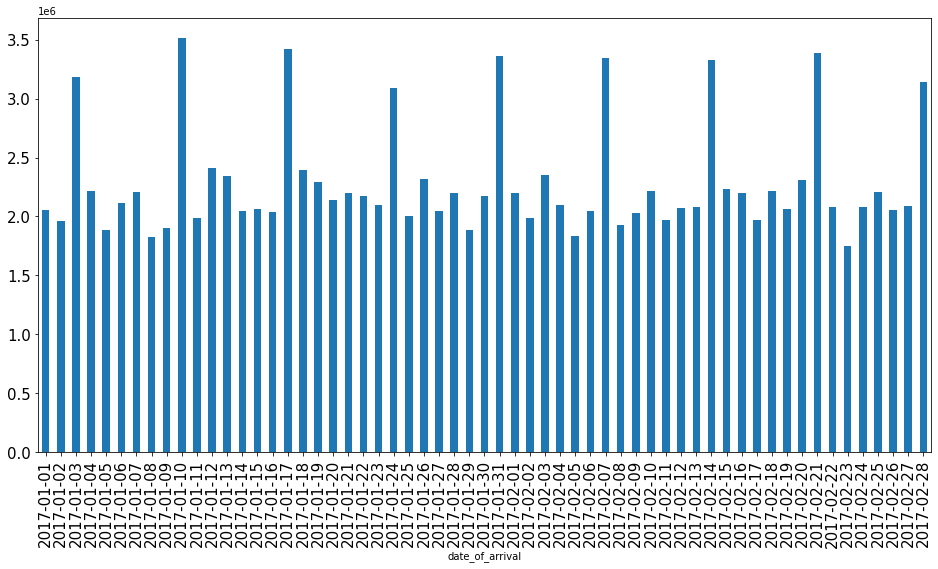

In [277]:
group_date = df.groupby('date_of_arrival').sum()
#group_date['month'] = group_date['date_of_arrival'].dt.month
#group_date['day'] = group_date['date_of_arrival'].dt.date
group_date['profit'].plot.bar(x=group_date.index, 
                              figsize=(16,8),
                              fontsize=15)

month
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

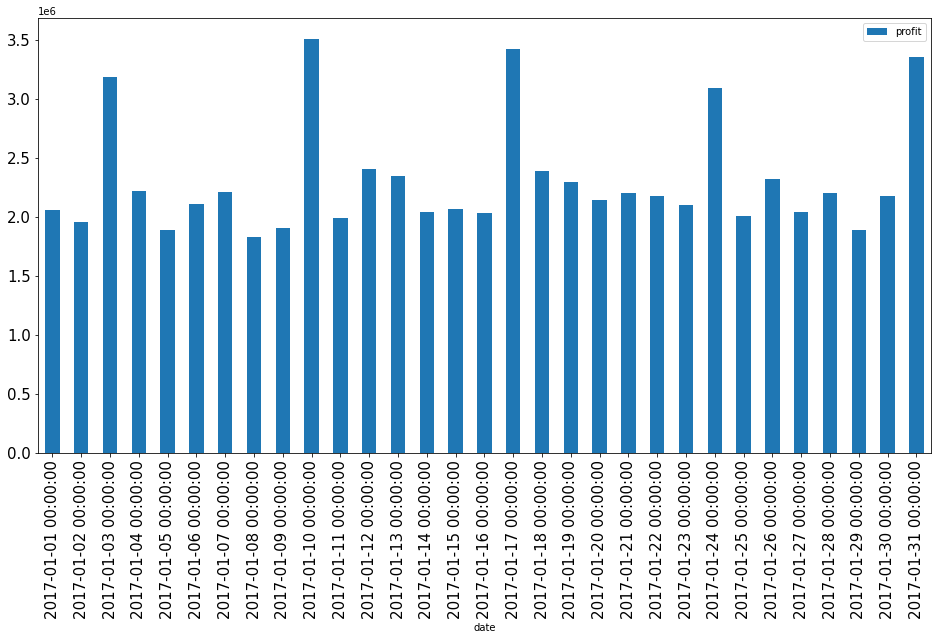

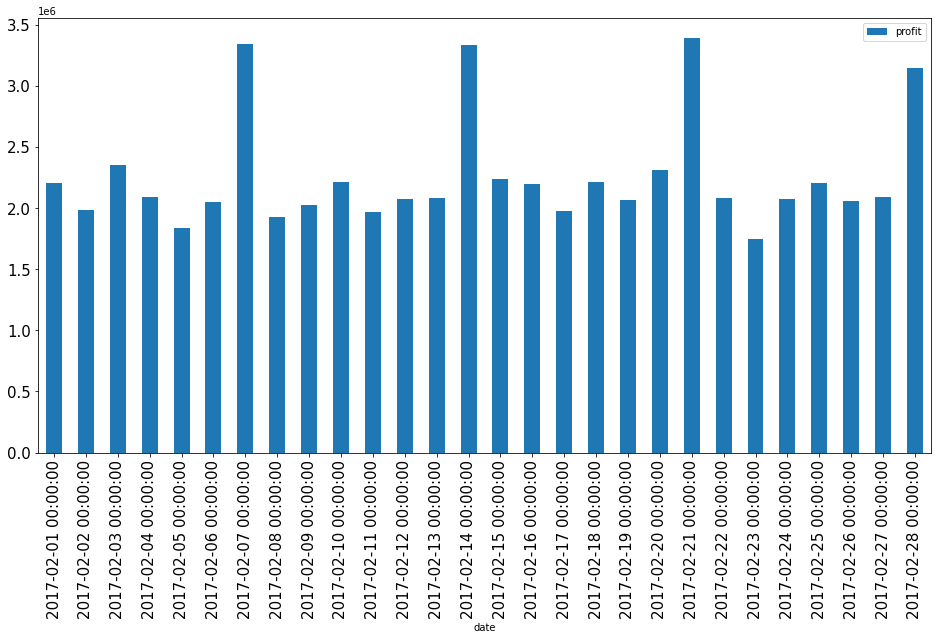

In [279]:
group_date['date'] = group_date.index
group_date['date'] = pd.to_datetime(group_date['date'])
group_date['month'] = group_date['date'].dt.month
group_date.groupby('month').plot.bar(x='date',
                                     y='profit',
                                               figsize=(16,8),
                                               fontsize=15)

In [293]:
group_date.groupby('month').sum()

,flight_id,ticket_economy,ticket_comfort,ticket_business,flight_time,total_amount,day,profit
month,,,,,,,,
1,295077.806452,198.935484,0.0,23.322581,199.161290,2.630793e+06,34.741935,2.307848e+06
2,292584.000000,195.464286,0.0,22.857143,193.964286,2.573439e+06,31.500000,2.259650e+06


flight_no
PG0194    AxesSubplot(0.125,0.125;0.775x0.755)
PG0252    AxesSubplot(0.125,0.125;0.775x0.755)
PG0480    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

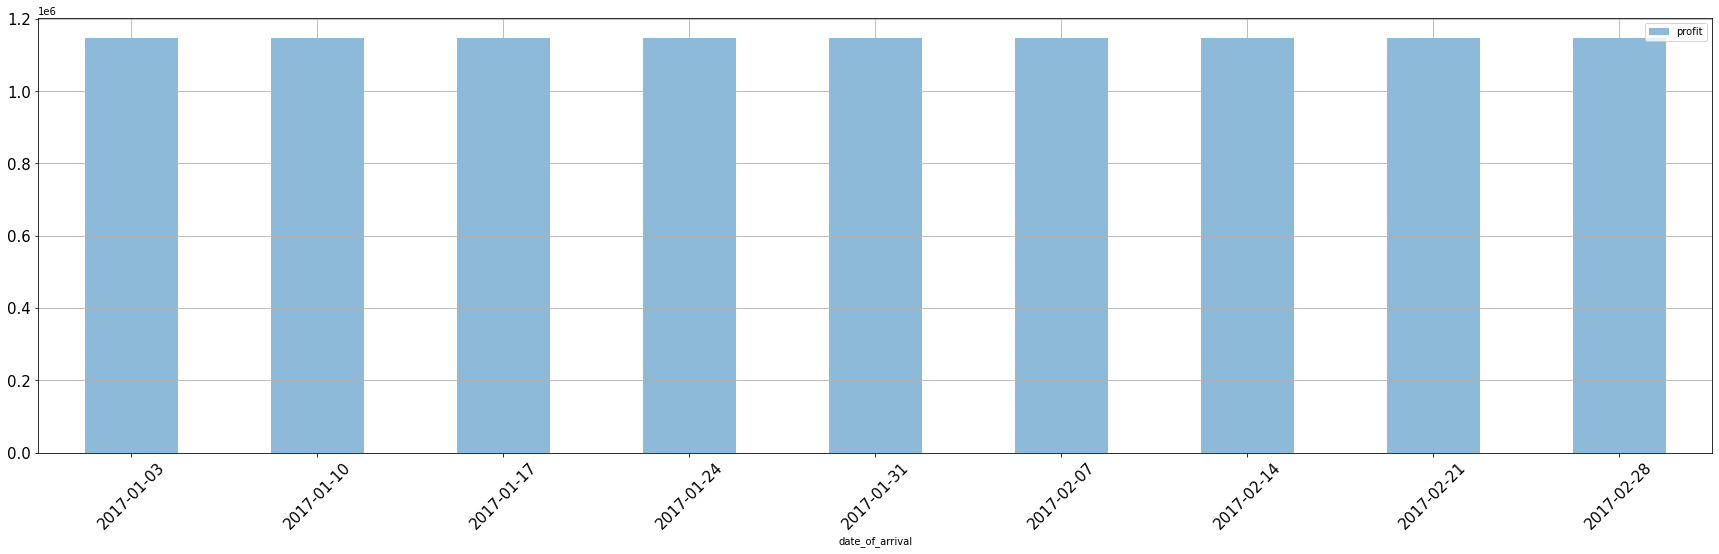

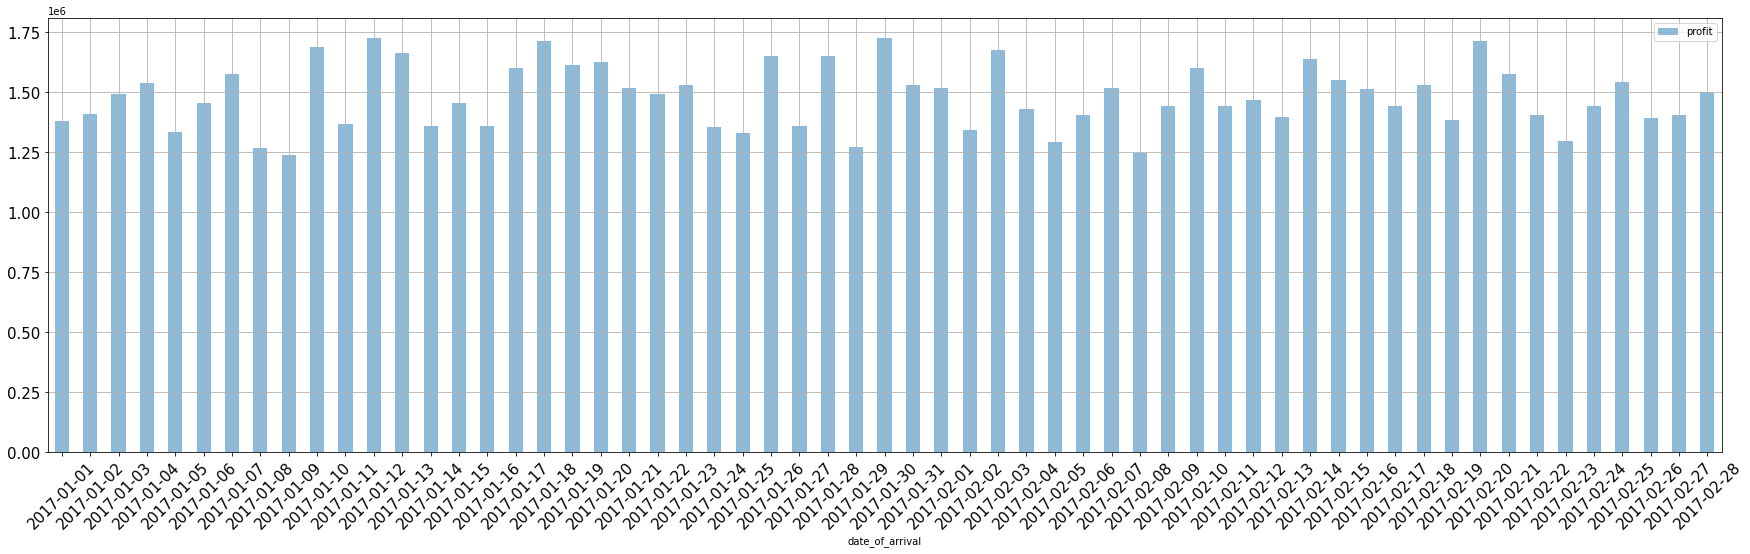

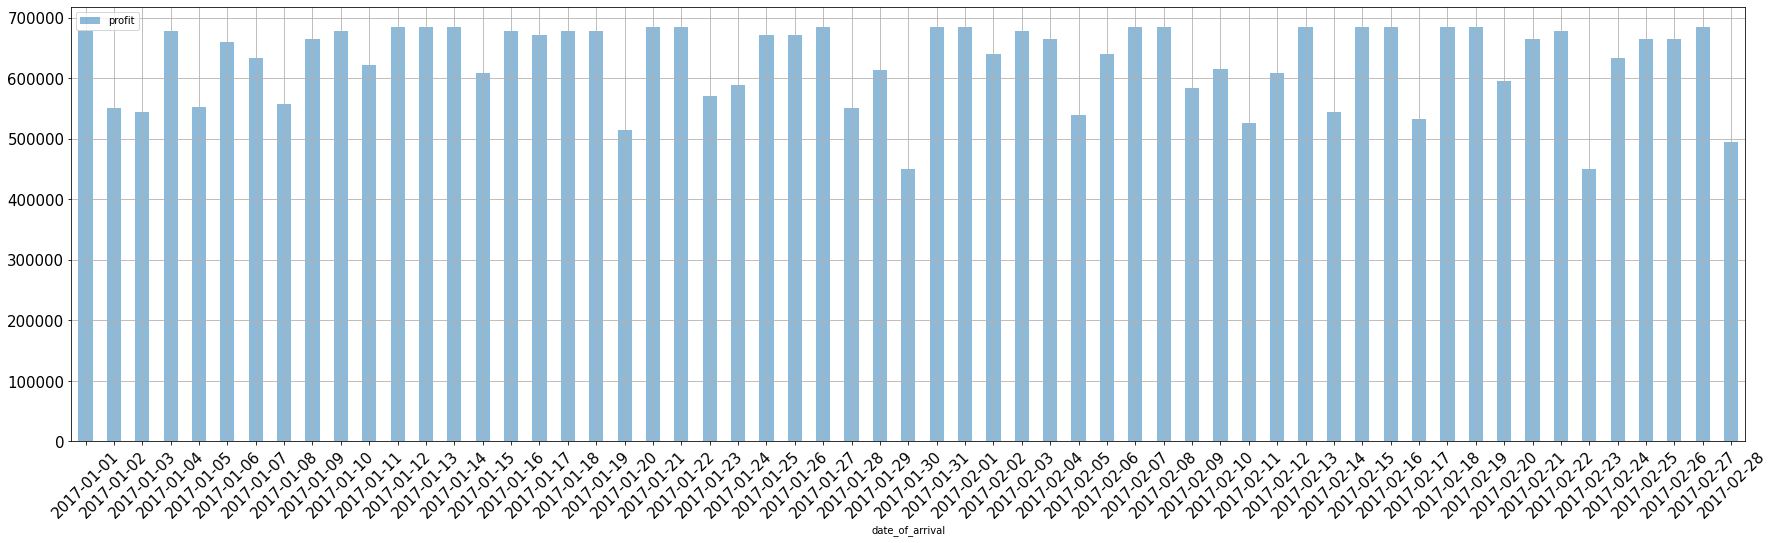

In [296]:
df.sort_values('date_of_arrival').groupby('flight_no').plot.bar(x='date_of_arrival',
                                    y='profit',
                                    alpha = 0.5,
                                    rot=45,
                                    grid=True,
                                    figsize=(30,8),
                                    fontsize=15, 
                                    legend=True
                                    )